In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from functools import reduce

In [96]:
publication_rec = pd.read_csv('Scopus-28061-Analyze-Year.csv', skiprows=7)
publication_rec = publication_rec.sort_values(by = ['YEAR'])
publication_rec.head()

,YEAR,Num_of_pub
54,1962,2
53,1963,1
52,1969,4
51,1970,3
50,1971,7


In [97]:
# Calculate cumulative number
cumulative_num = []
for idx, num in enumerate(publication_rec.Num_of_pub):
    if idx == 0:
        cumu_num = num
    else: 
        cumu_num += num
    cumulative_num.append(cumu_num)

publication_rec['CGR'] = cumulative_num
publication_rec = publication_rec.sort_values(by = ['YEAR'], ascending=False)
publication_rec['perct'] = '(' + (100 * publication_rec.Num_of_pub/sum(publication_rec.Num_of_pub)).round(2).astype(str) + '%' + ')'
publication_rec.head()

,YEAR,Num_of_pub,CGR,perct
0,2021,4143,24993,(16.58%)
1,2020,3744,20850,(14.98%)
2,2019,3527,17106,(14.11%)
3,2018,2518,13579,(10.07%)
4,2017,1677,11061,(6.71%)


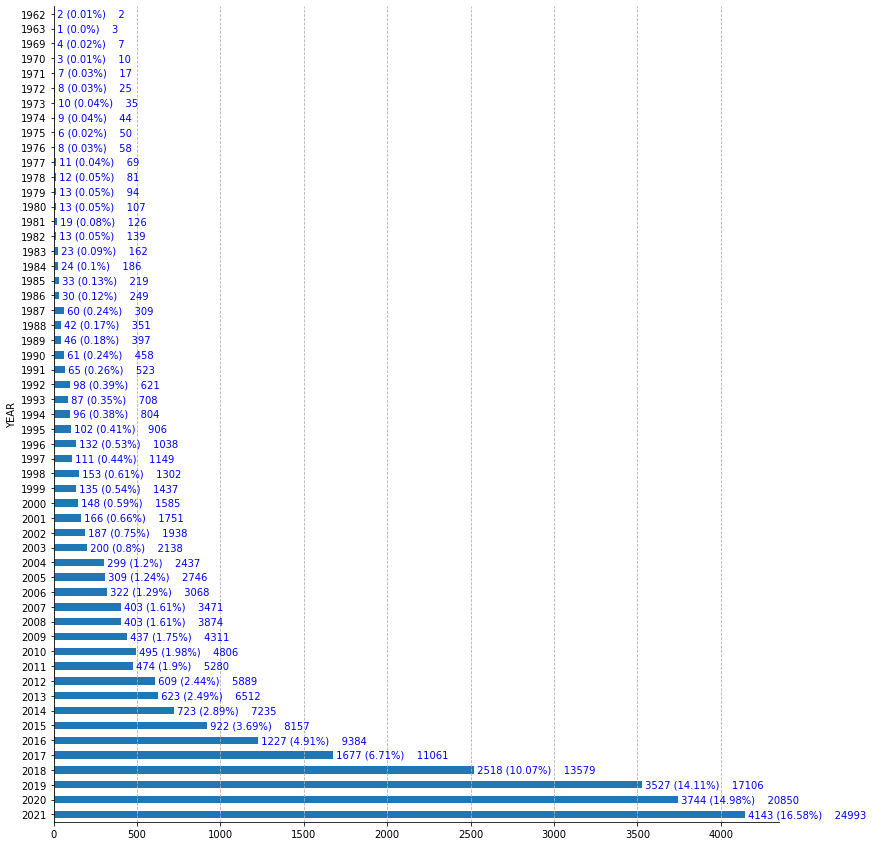

In [103]:
ax = publication_rec.plot(kind = 'barh', x = 'YEAR', y = 'Num_of_pub', figsize = (13, 15), legend = False)
# customize the label to include the percent
labels = [f' {v.get_width()} {publication_rec.iloc[i, 3]}    {publication_rec.iloc[i, 2]}' for i, v in enumerate(ax.containers[0])]
ax.bar_label(ax.containers[0], labels=labels, label_type='edge', size=10, color = 'blue')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid('on', which='minor', axis='x', linestyle = '--')
ax.grid('off', which='major', axis='x', linestyle = '--')
plt.savefig('publications'+'.jpg')